In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

In [64]:
# importing data
transaction_dataset= pd.read_csv("C:/Users/aishu/OneDrive/Documents/IOT_JComp/creditcard.csv")

In [65]:
# obtaining first ten rows of the dataset
transaction_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [66]:
# dataset information 
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
# descriptive statistics
transaction_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [68]:
# number of missing_values for each column
missing_values = transaction_dataset.isnull().sum()

print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [69]:
# distribution of legitimate transaction and fraudulent transaction
transaction_dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [70]:
# separating the data for data analysis
legit = transaction_dataset[transaction_dataset.Class == 0]
fraud = transaction_dataset[transaction_dataset.Class == 1]

print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [71]:
# descriptive statistics of Amount column in legitimate data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
# descriptive statistics of Amount column in fraudulent data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [73]:
# comparing the values for both transaction 
transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Class', ylabel='count'>

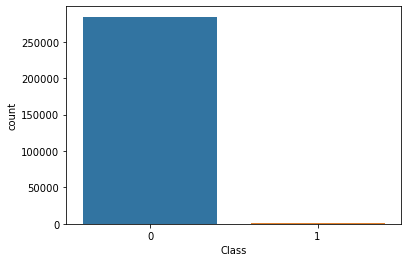

In [74]:
sns.countplot(x = 'Class', data = transaction_dataset)

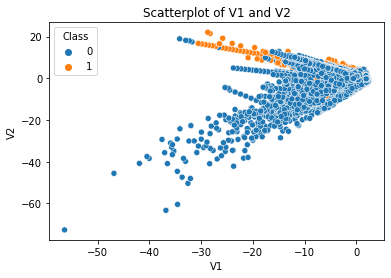

In [75]:
sns.scatterplot(x= 'V1', y= 'V2', hue = 'Class', data= transaction_dataset)
plt.title('Scatterplot of V1 and V2')
plt.show()

In [76]:
# matrix A is created by dropping the class column
A = transaction_dataset.drop(columns = 'Class', axis = 1)

A

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [77]:
# variable vector B consists of only the Class column
B = transaction_dataset['Class']

B

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [78]:
# splitting the data into training and testing data
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size = 0.2, stratify = B, random_state = 2)

In [79]:
print("Shape of A_train ", A_train.shape)
print("Shape of A_test ", A_test.shape)
print("Shape of B_train ", B_train.shape)
print("Shape of B_test ", B_test.shape)

Shape of A_train  (227845, 30)
Shape of A_test  (56962, 30)
Shape of B_train  (227845,)
Shape of B_test  (56962,)


In [80]:
# Logistic Regression
model_lr = LogisticRegression(max_iter = 100000)
model_lr.fit(A_train, B_train)

LogisticRegression(max_iter=100000)

In [81]:
A_train_prediction_lr = model_lr.predict(A_train)
lr_training_data_accuracy = accuracy_score(A_train_prediction_lr, B_train)
print('Logistic Regression Accuracy on Training Data:', lr_training_data_accuracy)
print(classification_report(B_train, A_train_prediction_lr))

Logistic Regression Accuracy on Training Data: 0.9991090434286467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.60      0.70       394

    accuracy                           1.00    227845
   macro avg       0.92      0.80      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [82]:
A_test_prediction_lr = model_lr.predict(A_test)
lr_testing_data_accuracy = accuracy_score(A_test_prediction_lr, B_test)
print('Logistic Regression Accuracy on Training Data:', lr_testing_data_accuracy)
print(classification_report(B_test, A_test_prediction_lr))

Logistic Regression Accuracy on Training Data: 0.9992802219023208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.67      0.76        98

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [83]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(A_train, B_train)

DecisionTreeClassifier()

In [84]:
A_train_prediction_dt = model_dt.predict(A_train)
dt_training_data_accuracy = accuracy_score(A_train_prediction_dt, B_train)
print('Decision Tree Accuracy on Training Data:', dt_training_data_accuracy)
print(classification_report(B_train, A_train_prediction_dt))

Decision Tree Accuracy on Training Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [85]:
A_test_prediction_dt = model_dt.predict(A_test)
dt_testing_data_accuracy = accuracy_score(A_test_prediction_dt, B_test)
print('Decision Tree Accuracy on Testing Data:', dt_testing_data_accuracy)
print(classification_report(B_test, A_test_prediction_dt))

Decision Tree Accuracy on Testing Data: 0.9992802219023208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [86]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(A_train, B_train)

RandomForestClassifier()

In [87]:
A_train_prediction_rf = model_rf.predict(A_train)
rf_training_data_accuracy = accuracy_score(A_train_prediction_rf, B_train)
print('Random Forest Accuracy on Training Data:', rf_training_data_accuracy)
print(classification_report(B_train, A_train_prediction_rf))

Random Forest Accuracy on Training Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [88]:
A_test_prediction_rf = model_rf.predict(A_test)
rf_testing_data_accuracy = accuracy_score(A_test_prediction_rf, B_test)
print('Random Forest Accuracy on Testing Data:', rf_testing_data_accuracy)
print(classification_report(B_test, A_test_prediction_rf))

Random Forest Accuracy on Testing Data: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
# Support Vector Machine
model_svm = SVC()
model_svm.fit(A_train, B_train)

SVC()

In [90]:
A_train_prediction_svm = model_svm.predict(A_train)
svm_training_data_accuracy = accuracy_score(A_train_prediction_svm, B_train)
print('Support Vector Machine Accuracy on Training Data:', svm_training_data_accuracy)
print(classification_report(B_train, A_train_prediction_svm))

Support Vector Machine Accuracy on Training Data: 0.9982707542408216


C:\Users\aishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845



C:\Users\aishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
A_test_prediction_svm = model_svm.predict(A_test)
svm_testing_data_accuracy = accuracy_score(A_test_prediction_svm, B_test)
print('Support Vector Machine Accuracy on Testing Data:', svm_testing_data_accuracy)
print(classification_report(B_test, A_test_prediction_svm, zero_division = 1))

Support Vector Machine Accuracy on Testing Data: 0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [92]:
# Naive Bayes Classifier
model_nb = GaussianNB()
model_nb.fit(A_train, B_train)

GaussianNB()

In [93]:
A_train_prediction_nb = model_nb.predict(A_train)
nb_training_data_accuracy = accuracy_score(A_train_prediction_nb, B_train)
print('Naive Bayes Classifier Accuracy on Training Data:', nb_training_data_accuracy)
print(classification_report(B_train, A_train_prediction_nb))

Naive Bayes Classifier Accuracy on Training Data: 0.9931707959358336
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.15      0.63      0.24       394

    accuracy                           0.99    227845
   macro avg       0.57      0.81      0.62    227845
weighted avg       1.00      0.99      1.00    227845



In [94]:
A_test_prediction_nb = model_nb.predict(A_test)
nb_testing_data_accuracy = accuracy_score(A_test_prediction_nb, B_test)
print('Naive Bayes Classifier Accuracy on Testing Data:', nb_testing_data_accuracy)
print(classification_report(B_test, A_test_prediction_nb))

Naive Bayes Classifier Accuracy on Testing Data: 0.9933639970506654
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.69      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.84      0.63     56962
weighted avg       1.00      0.99      1.00     56962



In [95]:
# randomly selecting 492 rows from the transaction dataset
ligit_sample = transaction_dataset.sample(n = 492)

In [96]:
# concatenating the random sample dataset with the fraudulent transactions dataset (creating the training and testing model)
new_transaction_dataset = pd.concat([ligit_sample, fraud], axis = 0)

In [97]:
new_transaction_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78213,57421.0,1.294449,0.146348,0.278478,0.516210,-0.349516,-0.737735,-0.033607,-0.102618,0.268687,...,-0.304584,-0.938651,0.089924,-0.154196,0.241588,0.129684,-0.037891,0.011279,1.79,0
4965,4522.0,-1.085561,1.254512,1.331521,1.300926,-0.353385,1.817554,-0.526294,-2.116588,1.637407,...,2.048840,-0.872019,-0.320051,-0.919969,0.008157,-0.161973,0.361278,0.096825,122.00,0
91661,63574.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0
108633,70999.0,-0.959895,1.634649,0.312642,0.820778,-0.265828,-0.552926,0.092590,0.678107,-0.894226,...,0.222480,0.387083,-0.132899,-0.136543,-0.153109,-0.310077,-0.208378,0.025826,11.34,0
280851,169790.0,1.894862,0.406503,-0.494368,3.957656,0.536608,0.602320,0.117805,-0.038158,-0.428578,...,-0.387041,-0.796587,0.187957,-0.665695,0.001321,-0.226018,-0.003662,-0.045084,22.00,0


In [98]:
# getting number of individual rows for fraudulent and legitimate transactions 
new_transaction_dataset['Class'].value_counts()

1    493
0    491
Name: Class, dtype: int64

In [99]:
# mean values of all features
new_transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92641.934827,0.010581,0.130818,0.124212,0.061982,-0.039710,0.040523,-0.019851,-0.066899,-0.026193,...,0.004910,0.040285,-0.021236,-0.012225,-0.006644,0.014713,-0.016257,0.025737,0.005642,85.702424
1,80655.924949,-4.770776,3.625318,-7.029397,4.541853,-3.154595,-1.397386,-5.572205,0.576238,-2.583351,...,0.372739,0.715286,0.015267,-0.040168,-0.104889,0.041062,0.051276,0.171190,0.076475,121.992759


<AxesSubplot:xlabel='Class', ylabel='count'>

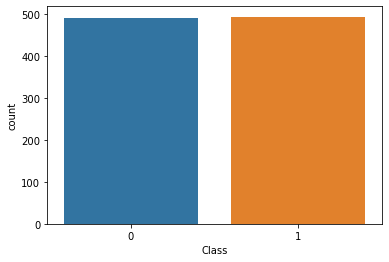

In [100]:
sns.countplot(x='Class', data=new_transaction_dataset)

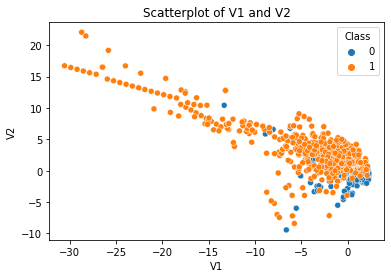

In [101]:
sns.scatterplot(x='V1', y='V2', hue='Class', data=new_transaction_dataset)
plt.title('Scatterplot of V1 and V2')
plt.show()

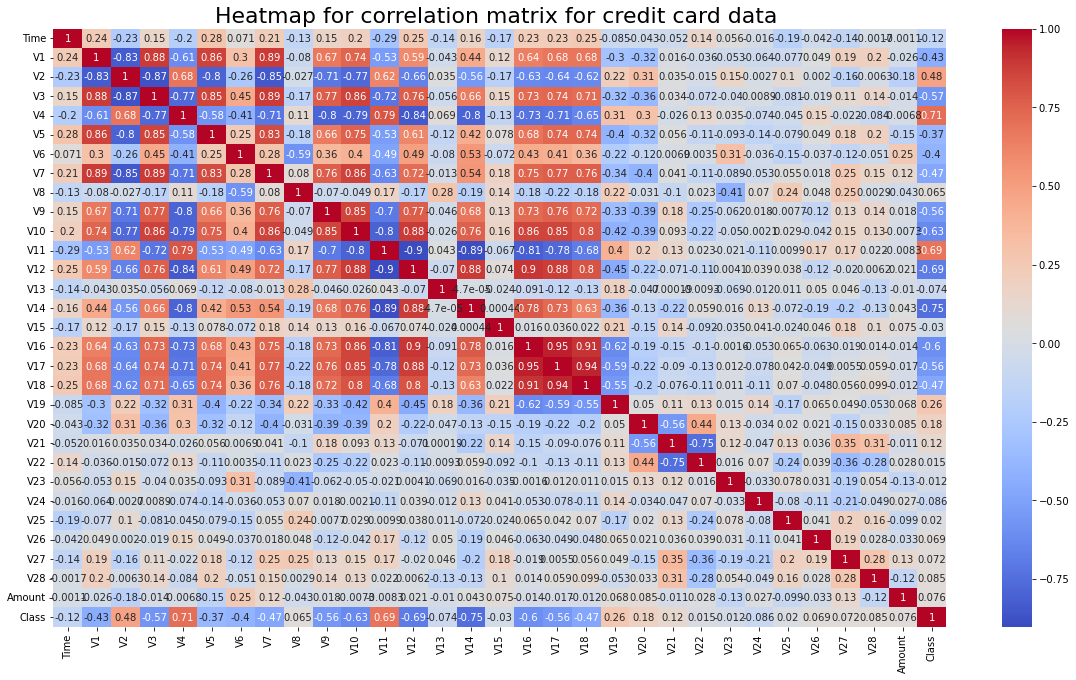

In [102]:
plt.figure(figsize = (20,11))

# heatmap size in ration 16:9
sns.heatmap(new_transaction_dataset.corr(), annot = True, cmap = 'coolwarm')

# heatmap parameters
plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

In [103]:
# matrix X is created by dropping the class column
X = new_transaction_dataset.drop(columns = 'Class', axis = 1)

X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
78213,57421.0,1.294449,0.146348,0.278478,0.516210,-0.349516,-0.737735,-0.033607,-0.102618,0.268687,...,-0.157321,-0.304584,-0.938651,0.089924,-0.154196,0.241588,0.129684,-0.037891,0.011279,1.79
4965,4522.0,-1.085561,1.254512,1.331521,1.300926,-0.353385,1.817554,-0.526294,-2.116588,1.637407,...,-0.664908,2.048840,-0.872019,-0.320051,-0.919969,0.008157,-0.161973,0.361278,0.096825,122.00
91661,63574.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.132080,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99
108633,70999.0,-0.959895,1.634649,0.312642,0.820778,-0.265828,-0.552926,0.092590,0.678107,-0.894226,...,-0.228820,0.222480,0.387083,-0.132899,-0.136543,-0.153109,-0.310077,-0.208378,0.025826,11.34
280851,169790.0,1.894862,0.406503,-0.494368,3.957656,0.536608,0.602320,0.117805,-0.038158,-0.428578,...,-0.186434,-0.387041,-0.796587,0.187957,-0.665695,0.001321,-0.226018,-0.003662,-0.045084,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [104]:
# variable vector Y consists of only the Class column
Y = new_transaction_dataset['Class']

Y

78213     0
4965      0
91661     0
108633    0
280851    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [105]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [106]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (787, 30)
Shape of X_test  (197, 30)
Shape of Y_train  (787,)
Shape of Y_test  (197,)


In [107]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [108]:
X_train_prediction_lr = lr_model.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Logistic Regression Accuracy on Training Data:', training_data_accuracy_lr)
print(classification_report(Y_train, X_train_prediction_lr))

Logistic Regression Accuracy on Training Data: 0.9415501905972046
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.96      0.92      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [109]:
X_test_prediction_lr = lr_model.predict(X_test)
testing_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Logistic Regression Accuracy on Testing Data:', testing_data_accuracy_lr)
print(classification_report(Y_test, X_test_prediction_lr))

Logistic Regression Accuracy on Testing Data: 0.9543147208121827
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [110]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [111]:
X_train_prediction_dt = dt_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)
print('Decision Tree Accuracy on Training Data:', training_data_accuracy_dt)
print(classification_report(Y_train, X_train_prediction_dt))

Decision Tree Accuracy on Training Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [112]:
X_test_prediction_dt = dt_model.predict(X_test)
testing_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)
print('Decision Tree Accuracy on Testing Data:', testing_data_accuracy_dt)
print(classification_report(Y_test, X_test_prediction_dt))

Decision Tree Accuracy on Testing Data: 0.8934010152284264
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        98
           1       0.87      0.93      0.90        99

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197



In [113]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [114]:
X_train_prediction_rf = rf_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)
print('Random Forest Accuracy on Training Data:', training_data_accuracy_rf)
print(classification_report(Y_train, X_train_prediction_rf))

Random Forest Accuracy on Training Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [115]:
X_test_prediction_rf = rf_model.predict(X_test)
testing_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Random Forest Accuracy on Testing Data:', testing_data_accuracy_rf)
print(classification_report(Y_test, X_test_prediction_rf))

Random Forest Accuracy on Testing Data: 0.9593908629441624
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.94      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [116]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [117]:
X_train_prediction_svm = svm_model.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)
print('Support Vector Machine Accuracy on Training Data:', training_data_accuracy_svm)
print(classification_report(Y_train, X_train_prediction_svm))

Support Vector Machine Accuracy on Training Data: 0.5209656925031766
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       393
           1       0.52      0.58      0.55       394

    accuracy                           0.52       787
   macro avg       0.52      0.52      0.52       787
weighted avg       0.52      0.52      0.52       787



In [118]:
X_test_prediction_svm = svm_model.predict(X_test)
testing_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)
print('Support Vector Machine Accuracy on Testing Data:', testing_data_accuracy_svm)
print(classification_report(Y_test, X_test_prediction_svm))

Support Vector Machine Accuracy on Testing Data: 0.49746192893401014
              precision    recall  f1-score   support

           0       0.49      0.41      0.45        98
           1       0.50      0.59      0.54        99

    accuracy                           0.50       197
   macro avg       0.50      0.50      0.49       197
weighted avg       0.50      0.50      0.49       197



In [119]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [120]:
X_train_prediction_nb = nb_model.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, Y_train)
print('Naive Bayes Classifier Accuracy on Training Data:', training_data_accuracy_nb)
print(classification_report(Y_train, X_train_prediction_nb))

Naive Bayes Classifier Accuracy on Training Data: 0.8678526048284625
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       393
           1       0.99      0.74      0.85       394

    accuracy                           0.87       787
   macro avg       0.89      0.87      0.87       787
weighted avg       0.89      0.87      0.87       787



In [121]:
X_test_prediction_nb = nb_model.predict(X_test)
testing_data_accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)
print('Naive Bayes Classifier Accuracy on Testing Data:', testing_data_accuracy_nb)
print(classification_report(Y_test, X_test_prediction_nb))

Naive Bayes Classifier Accuracy on Testing Data: 0.8781725888324873
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        98
           1       0.96      0.79      0.87        99

    accuracy                           0.88       197
   macro avg       0.89      0.88      0.88       197
weighted avg       0.89      0.88      0.88       197



In [122]:
# predict probabilities for the test set
probs = rf_model.predict_proba(X_test)
# keep only the positive class
probs = probs[:, 1]

In [123]:
# compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# compute AUC score
auc_score = auc(fpr, tpr)

print(auc_score)

0.9857245928674501


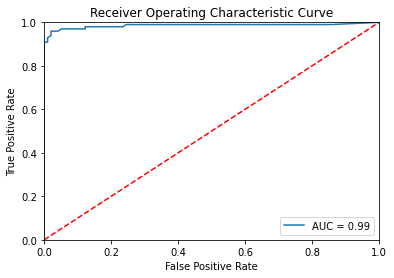

In [124]:
# plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()